In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
X=np.arange(0,5,0.1)
print(X)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9]


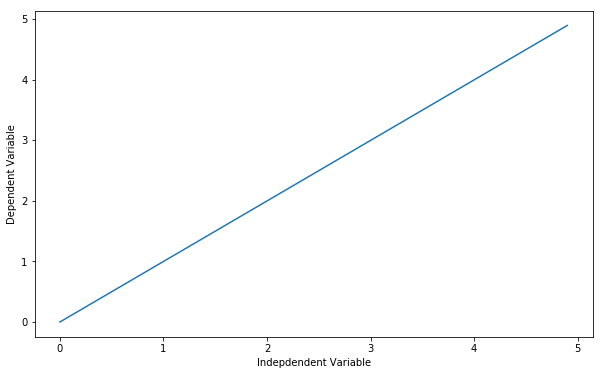

In [4]:
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [5]:
x_data = np.random.rand(100).astype(np.float32)
print(x_data.dtype)

float32


In [6]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
list(zip(x_data,y_data))[0:5]

[(0.059817109, 2.2323624585001496),
 (0.66492903, 4.1809199145665614),
 (0.33641702, 3.1969298132073436),
 (0.84808743, 4.4907666913037962),
 (0.85207486, 4.5241155300227636)]

In [7]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [8]:
loss = tf.reduce_mean(tf.square(y - y_data))
print(loss)
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
train_data = []

In [10]:
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        #print(step, evals)
        print(evals)
train_data.append(evals)

[2.646028, 3.0320485]
[2.5189056, 2.2702568]
[2.6728709, 2.1863697]
[2.7768345, 2.1286654]
[2.8473408, 2.0895336]
[2.8951564, 2.0629952]
[2.9275837, 2.0449977]
[2.9495752, 2.0327923]
[2.9644887, 2.0245149]
[2.9746032, 2.0189013]
[2.9814625, 2.0150943]
[2.9861145, 2.0125124]
[2.9892693, 2.0107615]
[2.9914088, 2.0095739]
[2.9928596, 2.0087688]
[2.9938433, 2.0082228]
[2.9945107, 2.0078523]
[2.9949634, 2.0076013]
[2.9952703, 2.0074308]
[2.9954784, 2.0073152]


In [14]:
file_writer = tf.summary.FileWriter("output1", sess.graph)
file_writer.close()

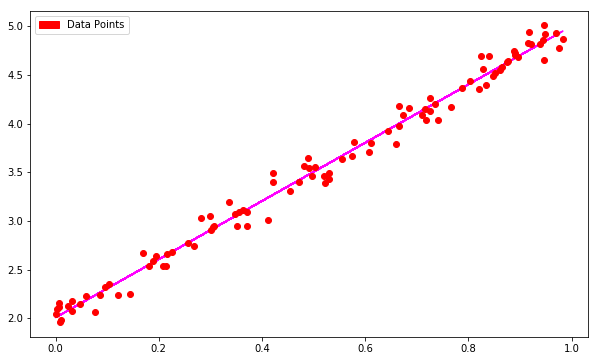

In [21]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()